In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#Problem 1
A physiotherapist with a male football team is interested in studying the relationship between foot injuries and the positions at which the players play from the data collected.
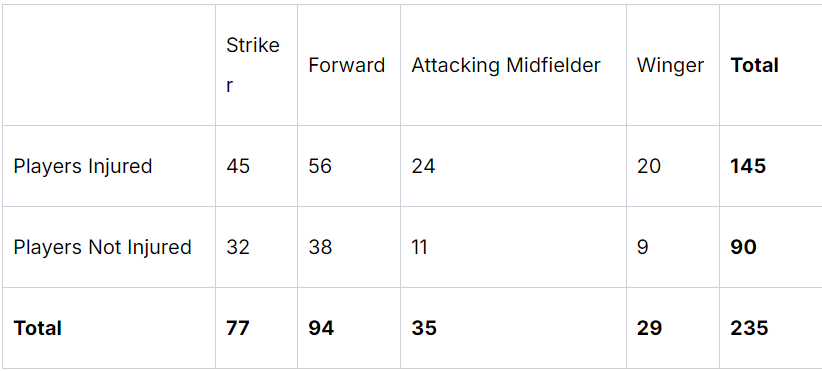




Based on the above data, answer the following questions.

**1.1 What is the probability that a randomly chosen player would suffer an injury?**

Probability (P)=

Total number of players/Number of players who suffered an injury

​
p = 145/235 = 0.61 i.e 61.7% probablity of a random player who will suffer injurey



**1.2 What is the probability that a player is a forward or a winger?**

total no of player is forward = 94

total no of player is winger = 29

total = 94+29 = 123

p = no of forward player+no of winger player/total no of player

p = 123/235

p = 0.52 i.e 52.34% probablity that a player is a forward or a winger



**1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?**

no of player who plays in striker position got injured is 45

total no of players = 235

p = 45/235 = 0.1914 that is 19.14%  probability that a randomly chosen player plays in a striker position and has a foot injury

**1.4 What is the probability that a randomly chosen injured player is a striker?**

no of player who plays in striker is 45

no of players who injured = 145

p = 45/145 = 0.31 i.e 31.0.%   is the probability that a randomly chosen injured player is a striker

#Problem 2

Problem 2
The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain; Answer the questions below based on the given information; (Provide an appropriate visual representation of your answers, without which marks will be deducted)

2.1 What proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm?

2.2 What proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm.?

2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?


In [ ]:
#2.1 What proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm
mu = 5
sigma =1.5
x = 3.17
#normally distributed
from scipy.stats import norm
breaking_strength_less_than = norm.cdf(3.17,mu,sigma)
prop = round(breaking_strength_less_than,2)
print('The proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm is',prop)

The proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm is 0.11


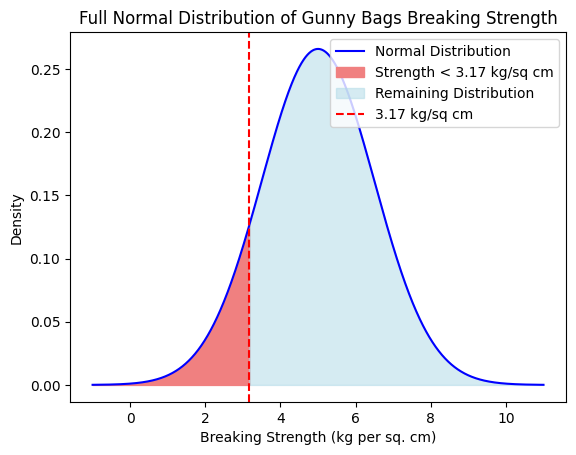

In [ ]:
#visualisation
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)
plt.plot(x, y, color='blue', label='Normal Distribution')

# Fill the area under the curve for breaking strength < 3.17
x_fill = np.linspace(mu - 4*sigma, 3.17, 1000)
y_fill = norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, y_fill, color='lightcoral', label='Strength < 3.17 kg/sq cm')
# Fill the remaining area under the curve
x_fill_remaining = np.linspace(3.17, mu + 4*sigma, 1000)
y_fill_remaining = norm.pdf(x_fill_remaining, mu, sigma)
plt.fill_between(x_fill_remaining, y_fill_remaining, color='lightblue', alpha=0.5, label='Remaining Distribution')
# Add vertical line at 3.17
plt.axvline(3.17, color='red', linestyle='--', label='3.17 kg/sq cm')
# Labels and title
plt.title('Full Normal Distribution of Gunny Bags Breaking Strength')
plt.xlabel('Breaking Strength (kg per sq. cm)')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

11% of the gunny bags have a breaking strength of less than 3.17 kg per sq cm.

In [ ]:
#2.2 What proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm.?
mu = 5
sigma =1.5
x = 3.6
#normally distributed
from scipy.stats import norm
breaking_strength_less_than = norm.cdf(3.6,mu,sigma)
prop = round(1-breaking_strength_less_than,2)
print('The proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm',prop)

The proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm 0.82


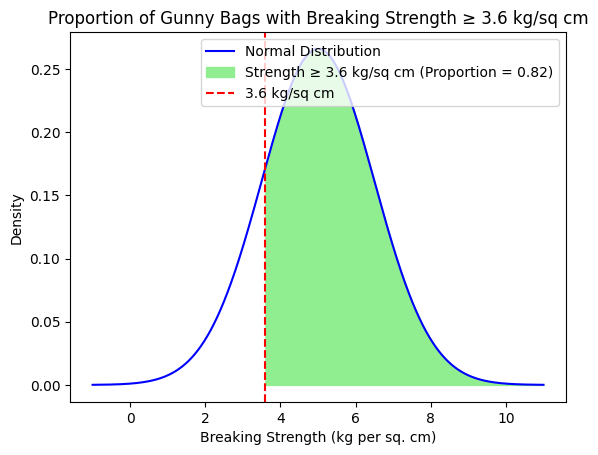

In [ ]:
breaking_strength_at_least = 1 - norm.cdf(x, mu, sigma)
prop = round(breaking_strength_at_least, 2)

# Define the range for the x-axis (breaking strength values)
x_values = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
# Calculate the normal distribution
y_values = norm.pdf(x_values, mu, sigma)
# Plot the full normal distribution
plt.plot(x_values, y_values, color='blue', label='Normal Distribution')
# Fill the area under the curve for breaking strength >= 3.6
x_fill = np.linspace(x, mu + 4*sigma, 1000)
y_fill = norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, y_fill, color='lightgreen', label=f'Strength ≥ 3.6 kg/sq cm (Proportion = {prop})')
# Add vertical line at 3.6
plt.axvline(x, color='red', linestyle='--', label='3.6 kg/sq cm')
# Labels and title
plt.title('Proportion of Gunny Bags with Breaking Strength ≥ 3.6 kg/sq cm')
plt.xlabel('Breaking Strength (kg per sq. cm)')
plt.ylabel('Density')
plt.legend(loc = 'upper right')
# Show plot
plt.show()

In [ ]:
#2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?
lower = 5
upper = 5.5
mu = 5
sigma = 1.5

lower_b = norm.cdf(5,5,1.5)

upper_b = norm.cdf(5.5,5,1.5)

between = upper_b - lower_b
print(round(between,2))s

0.13


the proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm is 13%

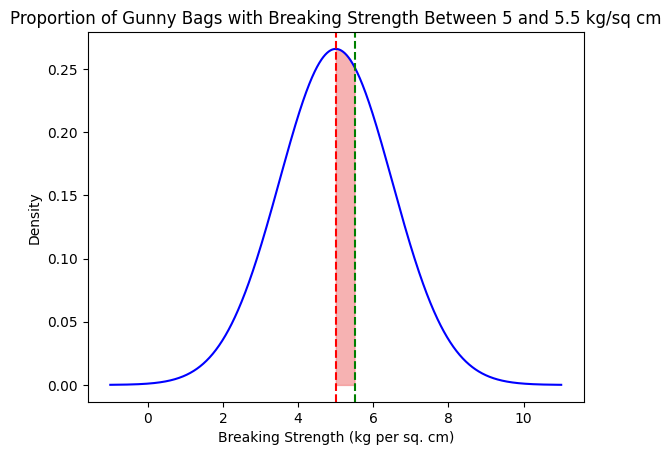

In [ ]:
x_values = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y_values = norm.pdf(x_values, mu, sigma)
plt.plot(x_values, y_values, color='blue', label='Normal Distribution')
# Fill the area under the curve between the lower and upper bounds
x_fill = np.linspace(lower, upper, 1000)
y_fill = norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, y_fill, color='lightcoral', alpha=0.6, label=f'Between {lower} and {upper} kg/sq cm (Proportion = {round(between, 2)})')

# Add vertical lines at the lower and upper bounds
plt.axvline(lower, color='red', linestyle='--', label=f'{lower} kg/sq cm')
plt.axvline(upper, color='green', linestyle='--', label=f'{upper} kg/sq cm')

# Labels and title
plt.title('Proportion of Gunny Bags with Breaking Strength Between 5 and 5.5 kg/sq cm')
plt.xlabel('Breaking Strength (kg per sq. cm)')
plt.ylabel('Density')


# Show plot
plt.show()

In [ ]:
#2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?
mu = 5
sigma = 1.5
#the probability that the breaking strength is less than 7.5 kg. Let's call this P1
x = 7.5
less_than_7 = norm.cdf(x,mu,sigma)
#the probability that the breaking strength is less than 3 kg. Let's call this P1
x = 3
less_than_3 = norm.cdf(x,mu,sigma)
#finding the difference between 7.5 and 3
difference = less_than_7-less_than_3
dif = print(round(difference,2))
print(dif)
#proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm
not_between = 1-0.86
print('proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm is',not_between)

0.86
None
proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm is 0.14


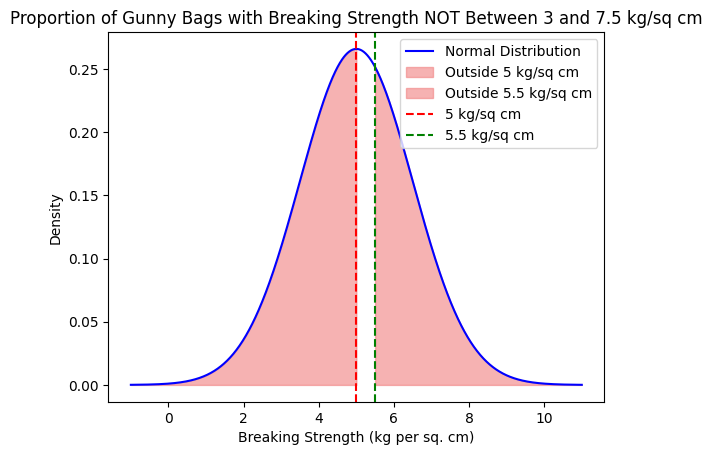

In [ ]:

# Calculate the proportion within the range and the proportion outside the range


# Define the range for the x-axis (breaking strength values)
x_values = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Calculate the normal distribution
y_values = norm.pdf(x_values, mu, sigma)

# Plot the normal distribution
plt.plot(x_values, y_values, color='blue', label='Normal Distribution')

# Fill the area under the curve outside the range [3, 7.5]
x_fill_left = np.linspace(mu - 4*sigma, lower, 1000)
y_fill_left = norm.pdf(x_fill_left, mu, sigma)
plt.fill_between(x_fill_left, y_fill_left, color='lightcoral', alpha=0.6, label=f'Outside {lower} kg/sq cm')

x_fill_right = np.linspace(upper, mu + 4*sigma, 1000)
y_fill_right = norm.pdf(x_fill_right, mu, sigma)
plt.fill_between(x_fill_right, y_fill_right, color='lightcoral', alpha=0.6, label=f'Outside {upper} kg/sq cm')

# Add vertical lines at the lower and upper bounds
plt.axvline(lower, color='red', linestyle='--', label=f'{lower} kg/sq cm')
plt.axvline(upper, color='green', linestyle='--', label=f'{upper} kg/sq cm')

# Labels and title
plt.title('Proportion of Gunny Bags with Breaking Strength NOT Between 3 and 7.5 kg/sq cm')
plt.xlabel('Breaking Strength (kg per sq. cm)')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()

#problem 3

Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image, the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level);

3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

3.2 Is the mean hardness of the polished and unpolished stones the same?

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/projects/inferential statistics coded project/Zingaro_Company.csv')

In [ ]:
df

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227
...,...,...
70,123.067611,142.293544
71,171.822218,140.124092
72,88.135994,141.393091
73,145.150397,131.370530


In [ ]:
print(df.columns)

Index(['Unpolished ', 'Treated and Polished'], dtype='object')


In [ ]:
df.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [ ]:
df.shape

(75, 2)

There are 75 rows and 2 columns in the dataset

In [ ]:
df.isnull().sum()

,0
Unpolished,0
Treated and Polished,0


There is no missing values in the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [ ]:
df.describe()

,Unpolished,Treated and Polished
count,75.000000,75.000000
mean,134.110527,147.788117
std,33.041804,15.587355
min,48.406838,107.524167
25%,115.329753,138.268300
50%,135.597121,145.721322
75%,158.215098,157.373318
max,200.161313,192.272856


the average hardness of index of unpolished stones is 134.11 and that of treated and polished is 147

the standard deviation of unpolished ston eis 33.04 and that of polished stone is 15.58

##3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

Null hypothesis = the unpolished stones may not be suitable that is the hardness index is less than 150

alternate hyothesis = the unpolished stones may be suitable that is the hardness index is atleast 150 or greater

 H₀ : mu < 150

 Ha : mu > 150

 level of significance = 5%

 Since the standard deviation of population is unknown we can go for one sample t-test

In [ ]:
#lets find the p value
import pandas as pd
from scipy.stats import ttest_1samp
# Performing the one-sample t-test
test_stat, pval = ttest_1samp(df['Unpolished '], popmean=150, alternative='greater')
print(test_stat)
print(round(pval,2))
#conclusion
if pval > 0.05:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that the unpolished stones are suitable for printing.")
else:
    print("Reject the null hypothesis. There is enough evidence to conclude that the unpolished stones are suitable for printing.")

-4.164629601426757
1.0
Fail to reject the null hypothesis. There is not enough evidence to conclude that the unpolished stones are suitable for printing.


Hypothesis: Testing if the unpolished stones are suitable for printing based on their hardness.
Test: One-sample t-test (right-tailed)
Conclusion:

Since p-value is approximately 1, which is greater than 0.05, we fail to reject the null hypothesis.
There is not enough evidence to conclude that the unpolished stones have a hardness index of at least 150, implying they may not be suitable for printing.

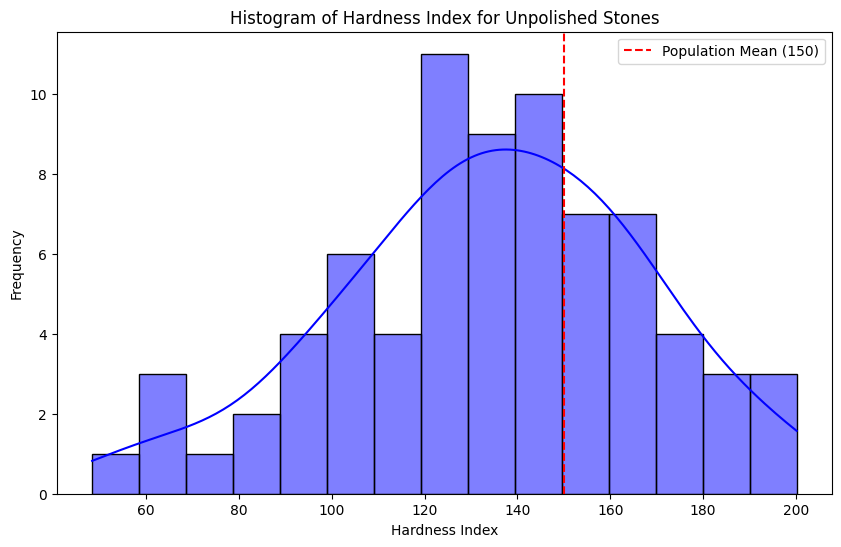

In [ ]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Unpolished '], bins=15, kde=True, color='blue', edgecolor='black')
plt.axvline(x=150, color='red', linestyle='--', label='Population Mean (150)')
plt.title('Histogram of Hardness Index for Unpolished Stones')
plt.xlabel('Hardness Index')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##3.2 Is the mean hardness of the polished and unpolished stones the same?

forming hypothesis
Null hypotheis - the mean hardness of polished and unpolished stones are same

Alternate hypotheis - The mean hypotheis of polished and unpolished are not same

H₀ : mu1 = mu2

Ha : mu != mu2

this is cleary test for 2 means and it is two tailed test

the average hardness of index of unpolished stones is 134.11 and that of treated and polished is 147

the standard deviation of unpolished ston eis 33.04 and that of polished stone is 15.58  since the standard deviations are different we opt here for
**Test for equality of means unequal and unknown std dev that / Two independent sample T-Test for equality of means**



In [ ]:
from scipy.stats import ttest_ind
test_stat,pvalue = ttest_ind(df['Unpolished '], df['Treated and Polished'], equal_var = False, alternative = 'two-sided')
print(pvalue)
if pvalue > 0.05:
    print("Fail to reject the null hypothesis.we have enough evidence to say that  the mean hardness of polished and unpolished stones are same")
else:
    print("Reject the null hypothesis. we have enough evidence to say that  the mean hardness of polished and unpolished stones are not same")

0.001588379295584306
Reject the null hypothesis. we have enough evidence to say that  the mean hardness of polished and unpolished stones are not same


Final Summarized Interpretation:

Hypothesis: Testing if the mean hardness of polished and unpolished stones is the same.
Test: Two-sample t-test with unequal variances.
Conclusion:

Since p-value (0.001588) is less than 0.05, reject the null hypothesis.
There is sufficient evidence to conclude that the mean hardness of polished and unpolished stones is different.

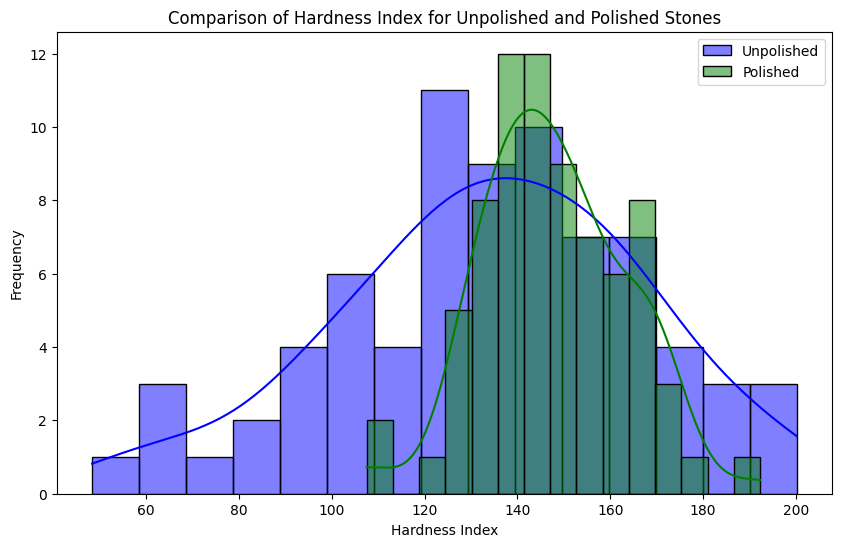

In [ ]:
# Plotting the histograms
plt.figure(figsize=(10, 6))
sns.histplot(df['Unpolished '], bins=15, kde=True, color='blue', edgecolor='black', label='Unpolished')
sns.histplot(df['Treated and Polished'], bins=15, kde=True, color='green', edgecolor='black', label='Polished')
plt.title('Comparison of Hardness Index for Unpolished and Polished Stones')
plt.xlabel('Hardness Index')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#Problem 4
Dental implant data: The hardness of metal implants in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as the dentists who may favor one method above another and may work better in his/her favorite method. The response is the variable of interest.

4.1 How does the hardness of implants vary depending on dentists?

4.2 How does the hardness of implants vary depending on methods?

4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

4.4 How does the hardness of implants vary depending on dentists and methods together?

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/projects/inferential statistics coded project/Dental Hardness data.csv')

In [ ]:
df.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


In [ ]:
df

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792
...,...,...,...,...,...
85,5,3,1,1600,483
86,5,3,1,1700,405
87,5,3,2,1500,536
88,5,3,2,1600,405


In [ ]:
df.shape

(90, 5)

there are 90 rows in the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [ ]:
df.isnull().sum()

,0
Dentist,0
Method,0
Alloy,0
Temp,0
Response,0


There are no missing values in the dataset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [ ]:
df.describe()

,Dentist,Method,Alloy,Temp,Response
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.000000,2.000000,1.500000,1600.000000,741.777778
std,1.422136,0.821071,0.502801,82.107083,145.767845
min,1.000000,1.000000,1.000000,1500.000000,289.000000
25%,2.000000,1.000000,1.000000,1500.000000,698.000000
50%,3.000000,2.000000,1.500000,1600.000000,767.000000
75%,4.000000,3.000000,2.000000,1700.000000,824.000000
max,5.000000,3.000000,2.000000,1700.000000,1115.000000


In [ ]:
import statsmodels.formula.api as sm #statstical modeling
from statsmodels.formula.api import ols #for ordinary least square regression
from statsmodels.stats.multicomp import pairwise_tukeyhsd  # For Tukey's HSD test

count      90.000000
mean      741.777778
std       145.767845
min       289.000000
25%       698.000000
50%       767.000000
75%       824.000000
max      1115.000000
Name: Response, dtype: float64


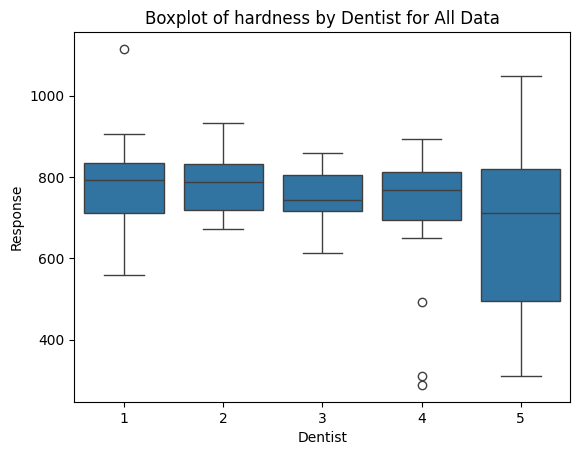

In [ ]:
#descrptive analysis
# Summary statistics of the hardness (Response) variable
print(df['Response'].describe())

# Check the distribution of hardness for each dentist
sns.boxplot(x='Dentist', y='Response', data=df)
plt.title('Boxplot of hardness by Dentist for All Data')
plt.show()

## Analyzing Each Alloy Separately

In [ ]:

# Perform Descriptive Analysis
# Display descriptive statistics of the data
print(df.groupby('Alloy')['Response'].describe())

# Check for the number of observations per group
print(df.groupby(['Alloy', 'Dentist']).size())

       count        mean         std    min    25%    50%    75%     max
Alloy                                                                   
1       45.0  707.488889  121.194551  289.0  681.0  743.0  782.0   882.0
2       45.0  776.066667  160.892595  312.0  715.0  824.0  858.0  1115.0
Alloy  Dentist
1      1          9
       2          9
       3          9
       4          9
       5          9
2      1          9
       2          9
       3          9
       4          9
       5          9
dtype: int64


In [ ]:

# Subset data for Alloy 1 and Alloy 2
df_alloy1 = df[df['Alloy'] == 1]
df_alloy2 = df[df['Alloy'] == 2]

**4.1 How does the hardness of implants vary depending on dentists?**

Hypothesis

Null Hypothesis (H₀): The mean hardness of implants is the same for all dentists.

Alternative Hypothesis (Ha): At least one dentist’s mean implant hardness is different from the others

Check the Assumptions of ANOVA

Independence: The samples must be independent.

Normality: The hardness data for each group (dentist) should be approximately normally distributed.


Homogeneity of variances: The variances of hardness should be roughly equal across groups.


# for Alloy 1

Using shapiro-wilk test to find out if it is normally distribted


Null Hypothesis (H₀): the distribution is normal

Alternative Hypothesis (Ha) The distribution is not normal

In [ ]:
#shapiro wilks test
dentists_alloy1 = df_alloy1['Dentist'].unique()
for Dentist in dentists_alloy1:
  hardness_data = df_alloy1[df_alloy1['Dentist'] == Dentist]['Response']
stat, p = stats.shapiro(hardness_data)
print(p)
if p>0.05 :
  print('Fail to reject the null hypothesis (data is normally distributed)')
else :
  print(' reject the null hypothesis (data is not normally distributed)')


0.08127790851660108
Fail to reject the null hypothesis (data is normally distributed)


In [ ]:
df['Dentist'].value_counts()

,count
Dentist,
1,18
2,18
3,18
4,18
5,18


In [ ]:
#lavenes test
#Suppose 'data_alloy1' is your DataFrame for Alloy 1 and 'dentists_alloy1' contains the unique dentist IDs.

# Perform Levene's test for homogeneity of variances
print("Levene's test for homogeneity of variances: ",
      stats.levene(df_alloy1[df_alloy1['Dentist'] == dentists_alloy1[0]]['Response'],
                   df_alloy1[df_alloy1['Dentist'] == dentists_alloy1[1]]['Response'],
                   df_alloy1[df_alloy1['Dentist'] == dentists_alloy1[2]]['Response'],
                   df_alloy1[df_alloy1['Dentist'] == dentists_alloy1[3]]['Response'],
                   df_alloy1[df_alloy1['Dentist'] == dentists_alloy1[4]]['Response']))




Levene's test for homogeneity of variances:  LeveneResult(statistic=1.3847146992797106, pvalue=0.2565537418543795)


p-value > 0.05: Fail to reject the null hypothesis, meaning variances are approximately equal across groups

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Function to perform ANOVA
def perform_anova(data, formula):
    model = ols(formula, data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    return anova_table

# Conduct ANOVA for Alloy 1
print("ANOVA Results for Alloy 1")
anova_alloy1 = perform_anova(df_alloy1, 'Response ~ C(Dentist)')
print(anova_alloy1)

ANOVA Results for Alloy 1
                   sum_sq    df         F    PR(>F)
C(Dentist)  106683.688889   4.0  1.977112  0.116567
Residual    539593.555556  40.0       NaN       NaN


Sum of Squares (sum_sq):

C(Dentist): The sum of squares for the groups (Dentists) is 106,683.69.
Residual: The sum of squares within the groups is 539,593.56.



Degrees of Freedom (df):

C(Dentist): The degrees of freedom for the groups are 4.
Residual: The degrees of freedom for the residuals are 40.



F-statistic (F):

The F-statistic value is 1.977112. This value is used to determine if the variance between the group means is significantly greater than the variance within the groups.



p-value (PR(>F)):

The p-value for this test is 0.116567. This value indicates the probability of observing an F-statistic as extreme as, or more extreme than, the observed value under the null hypothesis (that all group means are equal).

The p-value (0.116567) is greater than the common significance level of 0.05. Therefore, you fail to reject the null hypothesis.
This suggests that there is not enough evidence to conclude that there are significant differences in the means of the response variable across the different dentists

##For Alloy 2

In [ ]:
#shapiro wilks test
dentists_alloy2 = df_alloy2['Dentist'].unique()
for Dentist in dentists_alloy2:
  hardness_data = df_alloy2[df_alloy2['Dentist'] == Dentist]['Response']
stat, p = stats.shapiro(hardness_data)
print(p)
if p>0.05 :
  print('Fail to reject the null hypothesis (data is normally distributed)')
else :
  print(' reject the null hypothesis (data is not normally distributed)')

0.33861078485472895
Fail to reject the null hypothesis (data is normally distributed)


In [ ]:
#lavenes test
#Suppose 'data_alloy2' is your DataFrame for Alloy 1 and 'dentists_alloy1' contains the unique dentist IDs.

# Perform Levene's test for homogeneity of variances
print("Levene's test for homogeneity of variances: ",
      stats.levene(df_alloy2[df_alloy2['Dentist'] == dentists_alloy2[0]]['Response'],
                   df_alloy2[df_alloy2['Dentist'] == dentists_alloy2[1]]['Response'],
                   df_alloy2[df_alloy2['Dentist'] == dentists_alloy2[2]]['Response'],
                   df_alloy2[df_alloy2['Dentist'] == dentists_alloy2[3]]['Response'],
                   df_alloy2[df_alloy2['Dentist'] == dentists_alloy2[4]]['Response']))

Levene's test for homogeneity of variances:  LeveneResult(statistic=1.4456166464566966, pvalue=0.23686777576324952)


p-value > 0.05: Fail to reject the null hypothesis, meaning variances are approximately equal across groups

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Function to perform ANOVA
def perform_anova(data, formula):
    model = ols(formula, data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    return anova_table

# Conduct ANOVA for Alloy 2
print("ANOVA Results for Alloy 2")
anova_alloy2 = perform_anova(df_alloy2, 'Response ~ C(Dentist)')
print(anova_alloy2)

ANOVA Results for Alloy 2
                  sum_sq    df         F    PR(>F)
C(Dentist)  5.679791e+04   4.0  0.524835  0.718031
Residual    1.082205e+06  40.0       NaN       NaN


p-value (PR(>F)):

The p-value is 0.718031. This value is much higher than the common significance level of 0.05. Therefore, you fail to reject the null hypothesis.

Comparison with Alloy 1:

For both Alloy 1 and Alloy 2, the p-values are greater than 0.05, implying that for both alloys, there are no significant differences in responses among different dentists.

Alloy 1: F-statistic = 1.977112, p-value = 0.116567

Alloy 2: F-statistic = 0.524835, p-value = 0.718031

The findings from the ANOVA tests for both Alloy 1 and Alloy 2 support the null hypothesis that the mean hardness of implants does not significantly differ among the dentists. This consistency is valuable from a quality control perspective, indicating that dentist-specific factors may not be a significant source of variability in implant hardness.

**4.2 How does the hardness of implants vary depending on methods?**

Hypothesis

Null Hypothesis (H₀): The mean hardness of implants is the same across all methods for each alloy.

Alternative Hypothesis (Ha): At least one method's mean hardness is different from the others for each alloy.

In [ ]:
df['Method'].value_counts()

,count
Method,
1,30
2,30
3,30


#Alloy1

In [ ]:
#Normality Test (Shapiro-Wilk)
from scipy.stats import shapiro

# Function to check normality for alloy1
method_alloy1 = df_alloy1['Method'].unique()
for method in method_alloy1:
  hardness_data = df_alloy1[df_alloy1['Method'] == method]['Response']
stat, p = stats.shapiro(hardness_data)
print(p)
if p>0.05 :
  print('Fail to reject the null hypothesis (data is normally distributed)')
else :
  print(' reject the null hypothesis (data is not normally distributed)')

0.14254827970120204
Fail to reject the null hypothesis (data is normally distributed)


In [ ]:
##lavenes test

# Perform Levene's test for homogeneity of variances
print("Levene's test for homogeneity of variances: ",
      stats.levene(df_alloy1[df_alloy1['Method'] == method_alloy1[0]]['Response'],
                   df_alloy1[df_alloy1['Method'] == method_alloy1[1]]['Response'],
                   df_alloy1[df_alloy1['Method'] == method_alloy1[2]]['Response'],
                   ))


Levene's test for homogeneity of variances:  LeveneResult(statistic=6.52140454403598, pvalue=0.0034160381460233975)


p-value < 0.05: reject the null hypothesis, meaning variances are not equal across groups the assumption is falied but we should still continue the test

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Function to perform ANOVA
def perform_anova(data, formula):
    model = ols(formula, data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    return anova_table

# Conduct ANOVA for Alloy 1
print("ANOVA Results for Alloy 1")
anova_alloy1 = perform_anova(df_alloy1, 'Response ~ C(Method)')
print(anova_alloy1)

ANOVA Results for Alloy 1
                  sum_sq    df         F    PR(>F)
C(Method)  148472.177778   2.0  6.263327  0.004163
Residual   497805.066667  42.0       NaN       NaN


 The F-statistic is 6.263327, which tells us there is a significant amount of variability between group means compared to within-group variability.

  The p-value is 0.004163. Typically, a p-value less than 0.05 is considered statistically significant.

  A p-value of 0.004163 indicates that there is strong evidence against the null hypothesis, suggesting that at least one method is significantly different from the others in terms of the 'Response' value.

##Alloy 2

In [ ]:
#Normality Test (Shapiro-Wilk)
from scipy.stats import shapiro
# Function to check normality for alloy1
method_alloy2 = df_alloy1['Method'].unique()
for method in method_alloy1:
  hardness_data = df_alloy2[df_alloy2['Method'] == method]['Response']
stat, p = stats.shapiro(hardness_data)
print(p)
if p>0.05 :
  print('Fail to reject the null hypothesis (data is normally distributed)')
else :
  print(' reject the null hypothesis (data is not normally distributed)')

0.10259048044955665
Fail to reject the null hypothesis (data is normally distributed)


In [ ]:
#lavenes test

# Perform Levene's test for homogeneity of variances
print("Levene's test for homogeneity of variances: ",
      stats.levene(df_alloy2[df_alloy2['Method'] == method_alloy2[0]]['Response'],
                   df_alloy2[df_alloy2['Method'] == method_alloy2[1]]['Response'],
                   df_alloy2[df_alloy2['Method'] == method_alloy2[2]]['Response'],
                   ))


Levene's test for homogeneity of variances:  LeveneResult(statistic=3.349707184158617, pvalue=0.04469269939158668)


p-value < 0.05:  reject the null hypothesis, meaning variances are not equal across groups


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Function to perform ANOVA
def perform_anova(data, formula):
    model = ols(formula, data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    return anova_table

# Conduct ANOVA for Alloy 2
print("ANOVA Results for Alloy 2")
anova_alloy2 = perform_anova(df_alloy2, 'Response ~ C(Method)')
print(anova_alloy2)

ANOVA Results for Alloy 2
             sum_sq    df        F    PR(>F)
C(Method)  499640.4   2.0  16.4108  0.000005
Residual   639362.4  42.0      NaN       NaN


The F-statistic is 16.4108, indicating a significant amount of variability between the group means (methods) compared to within-group variability.

p-value of 0.000005 is extremely small, indicating very strong evidence against the null hypothesis. This suggests that at least one method's mean 'Response' is significantly different from the others




For both Alloy 1 and Alloy 2, the ANOVA results suggest that the mean hardness of implants significantly varies depending on the methods used. This means that for both alloys, at least one method's mean hardness is significantly different from the others, and the null hypothesis—that the mean hardness is the same across all methods—is rejected in both cases.

**4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?**

Null Hypothesis (( H_0 )): There is no interaction effect between dentist and method on the hardness of dental implants

Alternative Hypothesis (( H_a )): There is an interaction effect between dentist and method on the hardness of dental implants

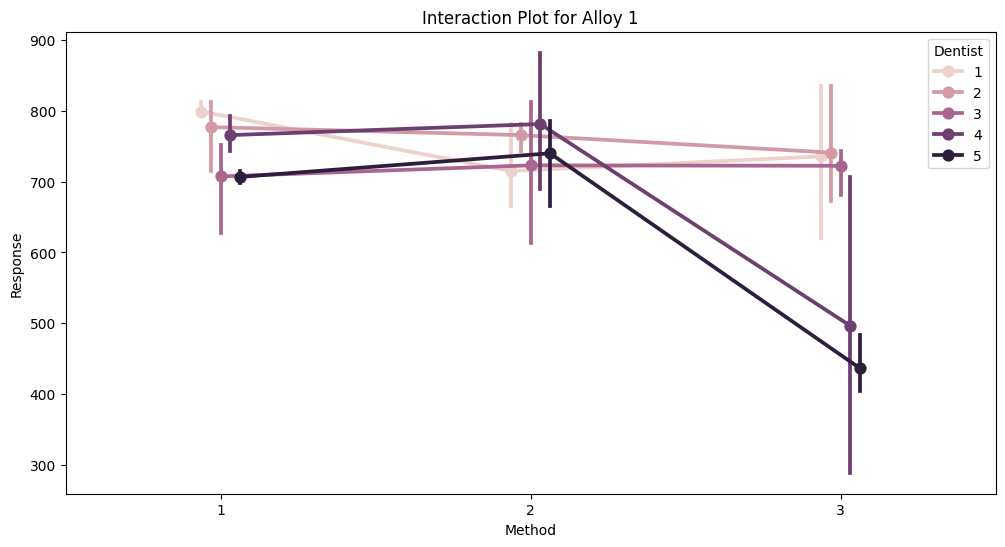

In [ ]:
#CREATING INTERACTION
# Filter data for Alloy 1


# Interaction Plot for Alloy 1
plt.figure(figsize=(12, 6))
sns.pointplot(data=df_alloy1, x='Method', y='Response', hue='Dentist', dodge=True)
plt.title('Interaction Plot for Alloy 1')
plt.ylabel('Response')
plt.xlabel('Method')
plt.show()

Stability in Methods 1 and 2: Hardness is mostly stable across different dentists for methods 1 and 2.

Drop in Method 3: There’s a noticeable drop in hardness for all dentists when using method 3, especially for dentists 4 and 5.

Dentists 4 and 5: These dentists show a bigger decrease in hardness with method 3, suggesting they might be more affected by this method.

Variability in Method 3: Method 3 shows more variability in hardness, making it less reliable, especially for certain dentists.

Key Insight: The method used and the dentist performing the procedure both affect the hardness, with method 3 being less consistent across different dentists.

In [ ]:
# Interaction term model for Alloy 1
model_alloy1 = ols('Response ~ C(Method) * C(Dentist)', data=df_alloy1).fit()
anova_table_alloy1 = sm.stats.anova_lm(model_alloy1, typ=2)
print("ANOVA Table for Alloy 1:")
print(anova_table_alloy1)

NameError: name 'ols' is not defined

F-statistic: 3.398383
p-value: 0.006793

Since the p-value is less than 0.05, we reject the null hypothesis for the interaction effect between Method and Dentist.
This means that the effect of the method on the hardness of dental implants depends on which dentist performs the method. There is a significant interaction between Method and Dentist.

## alloy2

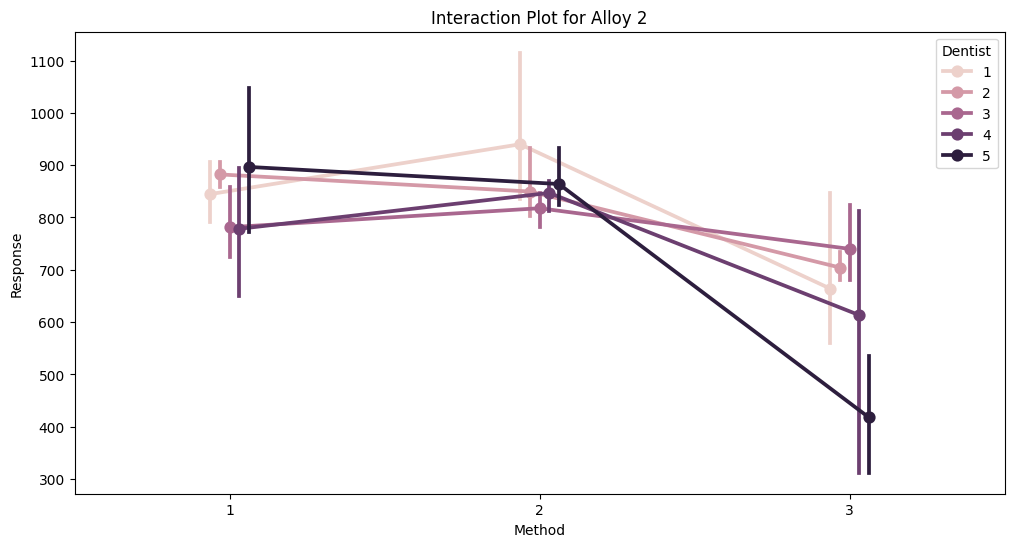

In [ ]:
# Interaction Plot for Alloy 2
plt.figure(figsize=(12, 6))
sns.pointplot(data=df_alloy2, x='Method', y='Response', hue='Dentist', dodge=True)
plt.title('Interaction Plot for Alloy 2')
plt.ylabel('Response')
plt.xlabel('Method')
plt.show()

Method 3: This method consistently shows a large decrease in hardness across all dentists, making it less reliable for producing strong dental implants with Alloy 2.

Method 2 with Dentist 2: There is a significant increase in hardness for dentist 2 with method 2, suggesting that this combination may be particularly effective.

Overall Consistency: The interaction between dentists and methods shows that the effectiveness of each method varies significantly depending on the dentist, especially for method 3. This highlights the importance of selecting the right method for each dentist to ensure consistent hardness in dental implants.







In [ ]:
# Two-Way ANOVA with Interaction for Alloy 2
model_alloy2 = ols('Response ~ C(Method) * C(Dentist)', data=df_alloy2).fit()
anova_table_alloy2 = sm.stats.anova_lm(model_alloy2, typ=2)
print("ANOVA Table for Alloy 2:")
print(anova_table_alloy2)

ANOVA Table for Alloy 2:
                             sum_sq    df          F    PR(>F)
C(Method)             499640.400000   2.0  19.461218  0.000004
C(Dentist)             56797.911111   4.0   1.106152  0.371833
C(Method):C(Dentist)  197459.822222   8.0   1.922787  0.093234
Residual              385104.666667  30.0        NaN       NaN


F-statistic: 19.461218
p-value: 0.000004

Since the p-value is less than 0.05, we reject the null hypothesis for the main effect of Method.
This means that the method used for dental implants significantly affects the hardness of the implants.

Interaction Effect

Null Hypothesis : There is no interaction effect between the dentist and the method on the hardness of dental implants.
Result: Reject for Alloy 1 (significant interaction effect), Fail to reject for Alloy 2 (no significant interaction effect).

**4.4 How does the hardness of implants vary depending on dentists and methods together?**

Null Hypotheses:

(H_{0M}): The means of hardness for dental implants do not differ across methods.

(H_{0D}): The means of hardness for dental implants do not differ across dentists.

(H_{0I}): There is no interaction effect between the dentist and the method on the hardness of dental implants.

Alternative Hypotheses:

(H_{aM}): The means of hardness for dental implants differ across methods.

(H_{aD}): The means of hardness for dental implants differ across dentists.

(H_{aI}): There is an interaction effect between the dentist and the method on the hardness of dental implants.

Assumptions for Two-Way ANOVA:

Independence of observations: The data should be collected and grouped independently.
Normality: The residuals (errors) of the model should be approximately normally distributed.
Homogeneity of variances: The variances among groups should be approximately equal.

We will proceed with testing even if the assumptions are not me

In [ ]:
# Group data by Dentist and Method
grouped_alloy1 = df_alloy1.groupby(['Dentist', 'Method'])['Response']
grouped_alloy2 = df_alloy2.groupby(['Dentist', 'Method'])['Response']

#Alloy1

In [ ]:
# Shapiro-Wilk test for Alloy 1
shapiro_alloy1 = grouped_alloy1.apply(lambda x: stats.shapiro(x).pvalue)
print("Shapiro-Wilk Test p-values for Alloy 1:")
print(shapiro_alloy1)


Shapiro-Wilk Test p-values for Alloy 1:
Dentist  Method
1        1         7.771561e-16
         2         5.291326e-01
         3         7.501321e-01
2        1         1.773366e-01
         2         4.763377e-01
         3         4.821650e-01
3        1         1.233624e-01
         2         6.724523e-01
         3         0.000000e+00
4        1         7.538369e-01
         2         8.395741e-01
         3         9.736223e-01
5        1         9.351627e-01
         2         7.144961e-01
         3         3.732292e-01
Name: Response, dtype: float64


entist 1, Method 1: p-value = (7.771561 \times 10^{-16}) (smaller than 0.05)

Interpretation: Reject H₀. The data is not normally distributed.



Dentist 1, Method 2: p-value = 0.5291326 (greater than 0.05)

Interpretation: Fail to reject H₀. The data is normally distributed.



Dentist 1, Method 3: p-value = 0.7501321 (greater than 0.05)

Interpretation: Fail to reject H₀. The data is normally distributed.



Dentist 2, Method 1: p-value = 0.1773366 (greater than 0.05)

Interpretation: Fail to reject H₀. The data is normally distributed.



Dentist 2, Method 2: p-value = 0.4763377 (greater than 0.05)

Interpretation: Fail to reject H₀. The data is normally distributed.



Dentist 2, Method 3: p-value = 0.482165 (greater than 0.05)

Interpretation: Fail to reject H₀. The data is normally distributed.



Dentist 3, Method 1: p-value = 0.1233624 (greater than 0.05)

Interpretation: Fail to reject H₀. The data is normally distributed.



Dentist 3, Method 2: p-value = 0.6724523 (greater than 0.05)

Interpretation: Fail to reject H₀. The data is normally distributed.



Dentist 3, Method 3: p-value = (0.0) (smaller than 0.05)

Interpretation: Reject H₀. The data is not normally distributed.



Dentist 4, Method 1: p-value = 0.753837 (greater than 0.05)

Interpretation: Fail to reject H₀. The data is normally distributed.



Dentist 4, Method 2: p-value = 0.8395741 (greater than 0.05)

Interpretation: Fail to reject H₀. The data is normally distributed.



Dentist 4, Method 3: p-value = 0.9736223 (greater than 0.05)

Interpretation: Fail to reject H₀. The data is normally distributed.



Dentist 5, Method 1: p-value = 0.9351627 (greater than 0.05)

Interpretation: Fail to reject H₀. The data is normally distributed.



Dentist 5, Method 2: p-value = 0.7144961 (greater than 0.05)

Interpretation: Fail to reject H₀. The data is normally distributed.



Dentist 5, Method 3: p-value = 0.3732292 (greater than 0.05)

Interpretation: Fail to reject H₀. The data is normally distributed.

Groups Not Normally Distributed:

Dentist 1, Method 1 (p-value (7.771561 \times 10^{-16}))
Dentist 3, Method 3 (p-value 0.0)



Groups Normally Distributed:

All other combinations fail to reject the null hypothesis and are normally distributed.

since the shapiro wilks test the pvalue is less than 0.05 the distribution is not normal

In [ ]:
#lavenes test
# Levene's test for Alloy 1
levene_alloy1 = stats.levene(*[group for name, group in grouped_alloy1])

print("\nLevene's Test p-value for Alloy 1:", levene_alloy1.pvalue)


Levene's Test p-value for Alloy 1: 0.3128166652989495


since the pvalue is greater then 0.05 for lavnes test  meaning variances are approximately equal across groups

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# Prepare the formula for two-way ANOVA
formula = 'Response ~ C(Dentist) * C(Method)'

# Two-way ANOVA for Alloy 1
model_alloy1 = ols(formula, data=df_alloy1).fit()
anova_alloy1 = anova_lm(model_alloy1)
print("\nTwo-Way ANOVA Results for Alloy 1:")
print(anova_alloy1)


Two-Way ANOVA Results for Alloy 1:
                        df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)             4.0  106683.688889  26670.922222   3.899638  0.011484
C(Method)              2.0  148472.177778  74236.088889  10.854287  0.000284
C(Dentist):C(Method)   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual              30.0  205180.000000   6839.333333        NaN       NaN


Methods :

F-statistic: 10.854287
p-value: 0.000284

Since the p-value for the Method factor is less than 0.05 (0.000284), we reject the null hypothesis. This means that the means of hardness for dental implants significantly differ across methods. Thus, we accept the alternative hypothesis .


Dentists :

F-statistic: 3.899638
p-value: 0.011484

Since the p-value for the Dentist factor is less than 0.05 (0.011484), we reject the null hypothesis . This means that the means of hardness for dental implants significantly differ across dentists. Thus, we accept the alternative hypothesis .


Interaction between Dentist and Method :

F-statistic: 3.398383
p-value: 0.006793

Since the p-value for the Interaction factor is less than 0.05 (0.006793), we reject the null hypothesis. This means there is a significant interaction effect between the dentist and the method on the hardness of dental implants. Thus, we accept the alternative hypothesis.

##Alloy2

In [ ]:

# Shapiro-Wilk test for Alloy 2
shapiro_alloy2 = grouped_alloy2.apply(lambda x: stats.shapiro(x).pvalue)
print("\nShapiro-Wilk Test p-values for Alloy 2:")
print(shapiro_alloy2)


Shapiro-Wilk Test p-values for Alloy 2:
Dentist  Method
1        1         0.723879
         2         0.219559
         3         0.150325
2        1         0.977498
         2         0.416681
         3         0.610211
3        1         0.532309
         2         0.680693
         3         0.438446
4        1         0.816045
         2         0.383917
         3         0.354480
5        1         0.683323
         2         0.175292
         3         0.813537
Name: Response, dtype: float64


Dentist 1, Method 1: p-value = 0.723879 > 0.05 (fail to reject H₀; data is normally distributed)

Dentist 1, Method 2: p-value = 0.219559 > 0.05 (fail to reject H₀; data is normally distributed)

Dentist 1, Method 3: p-value = 0.150325 > 0.05 (fail to reject H₀; data is normally distributed)

Dentist 2, Method 1: p-value = 0.977498 > 0.05 (fail to reject H₀; data is normally distributed)

Dentist 2, Method 2: p-value = 0.416681 > 0.05 (fail to reject H₀; data is normally distributed)

Dentist 2, Method 3: p-value = 0.610211 > 0.05 (fail to reject H₀; data is normally distributed)

Dentist 3, Method 1: p-value = 0.532309 > 0.05 (fail to reject H₀; data is normally distributed)
Dentist 3, Method 2: p-value = 0.680693 > 0.05 (fail to reject H₀; data is normally distributed)

Dentist 3, Method 3: p-value = 0.438446 > 0.05 (fail to reject H₀; data is normally distributed)

Dentist 4, Method 1: p-value = 0.816045 > 0.05 (fail to reject H₀; data is normally distributed)

Dentist 4, Method 2: p-value = 0.383917 > 0.05 (fail to reject H₀; data is normally distributed)
Dentist 4, Method 3: p-value = 0.354480 > 0.05 (fail to reject H₀; data is normally distributed)

Dentist 5, Method 1: p-value = 0.683323 > 0.05 (fail to reject H₀; data is normally distributed)

Dentist 5, Method 2: p-value = 0.175292 > 0.05 (fail to reject H₀; data is normally distributed)

Dentist 5, Method 3: p-value = 0.813537 > 0.05 (fail to reject H₀; data is normally distributed)

Normal Distribution: All combinations of Dentist and Method for Alloy 2 have p-values greater than 0.05, indicating that the data in all groups can be considered normally distributed

In [ ]:
# Levene's Test for Alloy 2
# Levene's test for Alloy 2
levene_alloy2 = stats.levene(*[group for name, group in grouped_alloy2])
print("Levene's Test p-value for Alloy 2:", levene_alloy2.pvalue)


Levene's Test p-value for Alloy 2: 0.7831735515657826


In [ ]:
# Two-way ANOVA for Alloy 2
model_alloy2 = ols(formula, data=df_alloy2).fit()
anova_alloy2 = anova_lm(model_alloy2)
print("\nTwo-Way ANOVA Results for Alloy 2:")
print(anova_alloy2)


Two-Way ANOVA Results for Alloy 2:
                        df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)             4.0   56797.911111   14199.477778   1.106152  0.371833
C(Method)              2.0  499640.400000  249820.200000  19.461218  0.000004
C(Dentist):C(Method)   8.0  197459.822222   24682.477778   1.922787  0.093234
Residual              30.0  385104.666667   12836.822222        NaN       NaN


Methods :

F-statistic: 19.461218
p-value: 0.000004 (less than 0.05)

Since the p-value for the Method factor is significantly less than 0.05, we reject the null hypothesis. This means that the means of hardness for dental implants significantly differ across methods. Thus, we accept the alternative hypothesis .


Dentists :

F-statistic: 1.106152
p-value: 0.371833 (greater than 0.05)

Since the p-value for the Dentist factor is greater than 0.05, we fail to reject the null hypothesis . This means that there is no significant difference in the means of hardness for dental implants across dentists. Consequently, we do not have enough evidence to accept the alternative hypothesis .


Interaction between Dentist and Method :

F-statistic: 1.922787
p-value: 0.093234 (greater than 0.05)

The p-value for the interaction C(Dentist):C(Method) is slightly greater than 0.05, so we fail to reject the null hypothesis . This indicates that there is no significant interaction effect between the dentist and the method on the hardness of dental implants. Therefore, we do not have enough evidence to accept the alternative hypothesis .